# Data Mining Assignment 1 - Raghav Goyal

## Clustering

In [1]:
#IMPORTING ALL THE NEEDED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
#IMPORTING THE DATASET AND CONVERTING ALL '?' TO NA VALUES

data_orig = pd.read_csv("../input/dataset.csv", sep=',',na_values = '?')
data = data_orig

In [3]:
data

,id,Account1,Monthly Period,History,Motive,Credit1,Account2,Employment Period,InstallmentRate,Gender&Type,...,Plan,Housing,#Credits,Post,#Authorities,Phone,Expatriate,InstallmentCredit,Yearly Period,Class
0,id344,ad,12.0,c2,p3,2141.0,sacc2,time4,3.0,F0,...,PL3,H2,1,Jb3,1,yes,False,12.524685,0.586894,2.0
1,id949,ac,10.0,c4,p0,781.0,sacc1,time5,4.0,F0,...,PL3,H3,2,Jb3,1,no,False,4.100509,0.734173,0.0
2,id744,ad,24.0,c2,p3,3235.0,sacc3,time5,3.0,M0,...,PL3,H2,1,Jb4,1,no,False,17.732072,1.590256,0.0
3,id402,ad,36.0,c2,p2,3349.0,sacc1,time3,4.0,M1,...,PL3,H2,1,Jb4,1,no,False,18.801397,3.095089,0.0
4,id564,ad,10.0,c2,p2,2210.0,sacc1,time3,2.0,F0,...,PL1,H1,1,Jb2,1,yes,False,11.779724,0.509442,1.0
5,id503,ad,24.0,c4,p2,1585.0,sacc1,time4,4.0,F0,...,PL3,H2,2,Jb3,1,yes,False,8.482914,2.340087,0.0
6,id966,aa,24.0,c1,p0,1193.0,sacc1,time1,1.0,M1,...,PL3,H1,2,Jb1,1,yes,False,6.769903,1.829510,2.0
7,id548,ac,24.0,c4,p3,3148.0,sacc5,time3,3.0,F0,...,PL3,H2,2,Jb3,1,no,False,16.920572,1.799712,1.0
8,id931,ad,18.0,c3,p3,2320.0,sacc1,time1,2.0,F1,...,PL3,H2,2,Jb3,1,yes,False,12.820065,1.751806,1.0
9,id164,aa,12.0,c2,p3,727.0,sacc2,time2,4.0,F1,...,PL3,H2,1,Jb2,1,no,False,2.972388,0.883757,1.0


## Data Preprocessing

In [4]:
#CHECKING NUMBER OF UNIQUE VALUES FOR EACH FEATURE

for column in data:
    print(column + " : " + str(data[column].nunique()))

id : 1031
Account1 : 4
Monthly Period : 33
History : 5
Motive : 10
Credit1 : 919
Account2 : 6
Employment Period : 5
InstallmentRate : 4
Gender&Type : 4
Sponsors : 4
Tenancy Period : 4
Plotsize : 8
Age : 53
Plan : 3
Housing : 3
#Credits : 4
Post : 4
#Authorities : 2
Phone : 2
Expatriate : 2
InstallmentCredit : 1028
Yearly Period : 1027
Class : 3


In [5]:
#CREATING A DIFFRENT DF FOR CLASS COLUMN

Class_column = data[['id','Class']]
Class_column

,id,Class
0,id344,2.0
1,id949,0.0
2,id744,0.0
3,id402,0.0
4,id564,1.0
5,id503,0.0
6,id966,2.0
7,id548,1.0
8,id931,1.0
9,id164,1.0


In [6]:
#LOOKING FOR REDUNDANT VALUES IN THE COLUMNS, IDENTIFIED A FEW

for col in data.columns:
    if(data[col].nunique()<=50):
        print("Column Name: "+col + " Values: ",data[col].unique())
        print()

Column Name: Account1 Values:  ['ad' 'ac' 'aa' 'ab' nan]

Column Name: Monthly Period Values:  [12. 10. 24. 36. 18.  6.  9. 21. 48. nan 27. 20. 14. 15. 42. 30. 45. 60.
  7. 39. 11. 13.  8. 54. 22. 33.  4.  5. 72. 40. 28. 26. 47. 16.]

Column Name: History Values:  ['c2' 'c4' 'c1' 'c3' 'c0' nan]

Column Name: Motive Values:  ['p3' 'p0' 'p2' 'p1' 'p6' 'p5' 'p9' 'p8' 'p4' 'p10' nan]

Column Name: Account2 Values:  ['sacc2' 'sacc1' 'sacc3' 'sacc5' 'Sacc4' 'sacc4']

Column Name: Employment Period Values:  ['time4' 'time5' 'time3' 'time1' 'time2']

Column Name: InstallmentRate Values:  [ 3.  4.  2.  1. nan]

Column Name: Gender&Type Values:  ['F0' 'M0' 'M1' 'F1']

Column Name: Sponsors Values:  ['G1' 'G2' 'G3' 'g1']

Column Name: Tenancy Period Values:  [ 1.  4.  2.  3. nan]

Column Name: Plotsize Values:  ['XL' 'LA' 'sm' 'ME' 'me' 'SM' 'M.E.' 'la']

Column Name: Plan Values:  ['PL3' 'PL1' 'PL2']

Column Name: Housing Values:  ['H2' 'H3' 'H1']

Column Name: #Credits Values:  [1 2 4 3]

Colum

In [7]:
#FIXING THE REDUNDANCY BY MERGING SIMILAR VALUES USING REPLACE FUNCTION

data['Plotsize'].replace('me', 'ME',inplace =True)
data['Plotsize'].replace('M.E.', 'ME',inplace =True)
data['Plotsize'].replace('sm', 'SM',inplace =True)
data['Plotsize'].replace('la', 'LA',inplace =True)
data['Account2'].replace('Sacc4', 'sacc4',inplace =True)
data['Sponsors'].replace('g1', 'G1',inplace =True)

In [8]:
#COLUMN VALUES AFTER FIXING THE REDUNDANCIES

for col in data.columns:
    if(data[col].nunique()<=50):
        print("Column Name: "+col + " Values: ",data[col].unique())
        print()

Column Name: Account1 Values:  ['ad' 'ac' 'aa' 'ab' nan]

Column Name: Monthly Period Values:  [12. 10. 24. 36. 18.  6.  9. 21. 48. nan 27. 20. 14. 15. 42. 30. 45. 60.
  7. 39. 11. 13.  8. 54. 22. 33.  4.  5. 72. 40. 28. 26. 47. 16.]

Column Name: History Values:  ['c2' 'c4' 'c1' 'c3' 'c0' nan]

Column Name: Motive Values:  ['p3' 'p0' 'p2' 'p1' 'p6' 'p5' 'p9' 'p8' 'p4' 'p10' nan]

Column Name: Account2 Values:  ['sacc2' 'sacc1' 'sacc3' 'sacc5' 'sacc4']

Column Name: Employment Period Values:  ['time4' 'time5' 'time3' 'time1' 'time2']

Column Name: InstallmentRate Values:  [ 3.  4.  2.  1. nan]

Column Name: Gender&Type Values:  ['F0' 'M0' 'M1' 'F1']

Column Name: Sponsors Values:  ['G1' 'G2' 'G3']

Column Name: Tenancy Period Values:  [ 1.  4.  2.  3. nan]

Column Name: Plotsize Values:  ['XL' 'LA' 'SM' 'ME']

Column Name: Plan Values:  ['PL3' 'PL1' 'PL2']

Column Name: Housing Values:  ['H2' 'H3' 'H1']

Column Name: #Credits Values:  [1 2 4 3]

Column Name: Post Values:  ['Jb3' 'Jb4' 

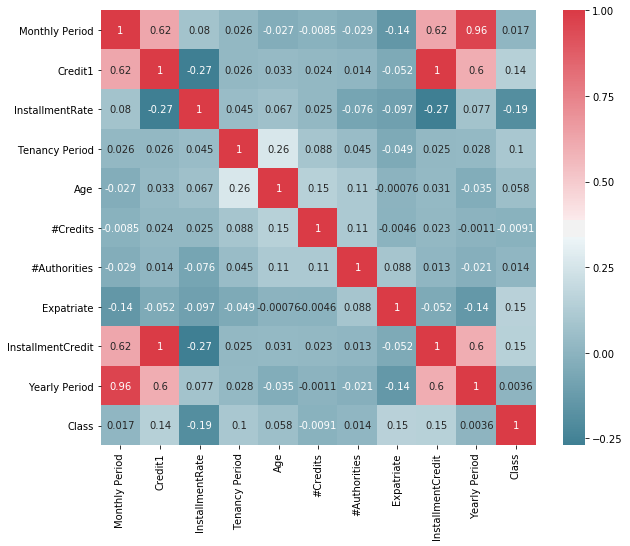

In [9]:
#CORRELATION TEST TO SEE WHICH FURTHER COLUMNS CAN BE REMOVED

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot = True);

In [10]:

data = data.drop(['Class'],1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 23 columns):
id                   1031 non-null object
Account1             1030 non-null object
Monthly Period       1027 non-null float64
History              1030 non-null object
Motive               1030 non-null object
Credit1              1028 non-null float64
Account2             1031 non-null object
Employment Period    1031 non-null object
InstallmentRate      1030 non-null float64
Gender&Type          1031 non-null object
Sponsors             1031 non-null object
Tenancy Period       1030 non-null float64
Plotsize             1031 non-null object
Age                  1028 non-null float64
Plan                 1031 non-null object
Housing              1031 non-null object
#Credits             1031 non-null int64
Post                 1031 non-null object
#Authorities         1031 non-null int64
Phone                1031 non-null object
Expatriate           1031 non-null bool
Installmen

In [11]:
#REMOVING HIGHLY CORRELATED COLUMNS AND REMOVING ID COLUMN

data = data.drop(['id','Credit1','Yearly Period'], 1) 

In [12]:
#CHECKING NUMBER OF UNIQUE VALUES IN EACH COLUMN TO DECIDE WHICH COLUMN IS CATEGORICAL AND WHICH IS CONTINUOUS

for column in data:
    print(column + " : " + str(len(data[column].unique())))

Account1 : 5
Monthly Period : 34
History : 6
Motive : 11
Account2 : 5
Employment Period : 5
InstallmentRate : 5
Gender&Type : 4
Sponsors : 3
Tenancy Period : 5
Plotsize : 4
Age : 54
Plan : 3
Housing : 3
#Credits : 4
Post : 4
#Authorities : 2
Phone : 2
Expatriate : 2
InstallmentCredit : 1029


In [13]:
#FILLING NA VALUES OF CATEGORICAL COLUMNS WITH MODE

a = ['Account1','History','Motive','InstallmentRate','Tenancy Period']
for i in a:
    data[i].fillna(data[i].mode()[0] ,inplace= True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 20 columns):
Account1             1031 non-null object
Monthly Period       1027 non-null float64
History              1031 non-null object
Motive               1031 non-null object
Account2             1031 non-null object
Employment Period    1031 non-null object
InstallmentRate      1031 non-null float64
Gender&Type          1031 non-null object
Sponsors             1031 non-null object
Tenancy Period       1031 non-null float64
Plotsize             1031 non-null object
Age                  1028 non-null float64
Plan                 1031 non-null object
Housing              1031 non-null object
#Credits             1031 non-null int64
Post                 1031 non-null object
#Authorities         1031 non-null int64
Phone                1031 non-null object
Expatriate           1031 non-null bool
InstallmentCredit    1028 non-null float64
dtypes: bool(1), float64(5), int64(2), object(12)
me

In [15]:
#FILLING NA VALUES OF CONTINUOUS COLUMNS WITH MEDIAN

b = ['Monthly Period','Age','InstallmentCredit']
for i in b:
    data[i].fillna(data[i].median(),inplace= True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 20 columns):
Account1             1031 non-null object
Monthly Period       1031 non-null float64
History              1031 non-null object
Motive               1031 non-null object
Account2             1031 non-null object
Employment Period    1031 non-null object
InstallmentRate      1031 non-null float64
Gender&Type          1031 non-null object
Sponsors             1031 non-null object
Tenancy Period       1031 non-null float64
Plotsize             1031 non-null object
Age                  1031 non-null float64
Plan                 1031 non-null object
Housing              1031 non-null object
#Credits             1031 non-null int64
Post                 1031 non-null object
#Authorities         1031 non-null int64
Phone                1031 non-null object
Expatriate           1031 non-null bool
InstallmentCredit    1031 non-null float64
dtypes: bool(1), float64(5), int64(2), object(12)
me

In [17]:
#DROPPING DUPLICATES IF ANY

data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 20 columns):
Account1             1031 non-null object
Monthly Period       1031 non-null float64
History              1031 non-null object
Motive               1031 non-null object
Account2             1031 non-null object
Employment Period    1031 non-null object
InstallmentRate      1031 non-null float64
Gender&Type          1031 non-null object
Sponsors             1031 non-null object
Tenancy Period       1031 non-null float64
Plotsize             1031 non-null object
Age                  1031 non-null float64
Plan                 1031 non-null object
Housing              1031 non-null object
#Credits             1031 non-null int64
Post                 1031 non-null object
#Authorities         1031 non-null int64
Phone                1031 non-null object
Expatriate           1031 non-null bool
InstallmentCredit    1031 non-null float64
dtypes: bool(1), float64(5), int64(2), object(12)
me

In [18]:
#LABEL ENCODING

le = LabelEncoder()
datacopyoh = data.copy()
data_copy = data.copy()

for col in data.columns:
    if(data[col].dtype == np.object):
        le.fit(data[col])
        data[col] = le.transform(data[col])

In [19]:
#ONE HOT ENCODING

oh_cols = []
for col in datacopyoh.columns:
    if(datacopyoh[col].dtype == np.object):
        oh_cols.append(col)

datacopyoh = pd.get_dummies(datacopyoh, columns=oh_cols)

In [20]:
#SCALING THE LABEL-ENCODED FEATURES USING MINMAXSCALER

target = Class_column['Class']
sc = MinMaxScaler()
data_sc = pd.DataFrame(sc.fit_transform(data),columns = data.columns)
data_sc['Class'] = target

In [21]:
#SCALING THE ONE-HOT-ENCODED FEATURES USING MINMAXSCALER

target = Class_column['Class']
sc = MinMaxScaler()
datacopyoh_sc = pd.DataFrame(sc.fit_transform(datacopyoh),columns = datacopyoh.columns)
datacopyoh_sc['Class'] = target

In [22]:
#DEFINING A FUNCTION TO MEASURE ACCURACY OF THE MODEL

def measuring_accuracy(predicted,target):
    best_accuracy = 0 
    val = pd.DataFrame(predicted[:175],columns=['temp'])
    target = target.loc[:174]
    combinations = [[0,1,2],[0,2,1],[1,0,2],[1,2,0],[2,0,1],[2,1,0]]
    predicted = pd.DataFrame(predicted,columns=['temp'])
    output = predicted
    ite=0
    
    for i,comb in enumerate(combinations):
        pr_temp = val['temp'].apply(lambda x: comb[0] if x==0 else comb[1] if x==1 else comb[2])
        acc_temp = accuracy_score(pr_temp,target)
        if(acc_temp>best_accuracy):
            best_accuracy = acc_temp
            output = predicted['temp'].apply(lambda x: comb[0] if x==0 else comb[1] if x==1 else comb[2])
            ite=i
            
    return best_accuracy*100,output.as_matrix()

In [23]:
datacopyoh_sc.columns

Index(['Monthly Period', 'InstallmentRate', 'Tenancy Period', 'Age',
       '#Credits', '#Authorities', 'Expatriate', 'InstallmentCredit',
       'Account1_aa', 'Account1_ab', 'Account1_ac', 'Account1_ad',
       'History_c0', 'History_c1', 'History_c2', 'History_c3', 'History_c4',
       'Motive_p0', 'Motive_p1', 'Motive_p10', 'Motive_p2', 'Motive_p3',
       'Motive_p4', 'Motive_p5', 'Motive_p6', 'Motive_p8', 'Motive_p9',
       'Account2_sacc1', 'Account2_sacc2', 'Account2_sacc3', 'Account2_sacc4',
       'Account2_sacc5', 'Employment Period_time1', 'Employment Period_time2',
       'Employment Period_time3', 'Employment Period_time4',
       'Employment Period_time5', 'Gender&Type_F0', 'Gender&Type_F1',
       'Gender&Type_M0', 'Gender&Type_M1', 'Sponsors_G1', 'Sponsors_G2',
       'Sponsors_G3', 'Plotsize_LA', 'Plotsize_ME', 'Plotsize_SM',
       'Plotsize_XL', 'Plan_PL1', 'Plan_PL2', 'Plan_PL3', 'Housing_H1',
       'Housing_H2', 'Housing_H3', 'Post_Jb1', 'Post_Jb2', 'Post_Jb3',


/home/raghav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


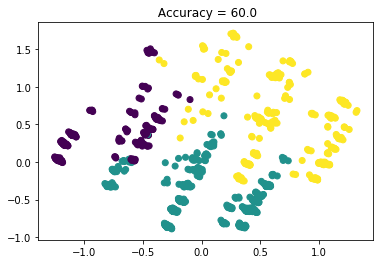

In [24]:
#USING K-MEANS TO FORM CLUSTERS

target1 = datacopyoh_sc['Class']
df_main = data_copy.copy()

datacopyoh_sc = datacopyoh_sc.loc[:, datacopyoh_sc.columns != 'Class']

#USING ONLY THE IDENTIFIED FEATURES WHICH GIVE BEST RESULTS

datacopyoh_sc = datacopyoh_sc[['InstallmentRate', 'Age', 'Monthly Period', 'Account1_aa', 'Account1_ab',
       'Account1_ac', 'Account1_ad', 'History_c0', 'History_c1', 'History_c2',
       'History_c3', 'History_c4', 'Plotsize_SM', 'Plotsize_ME',
       'Plotsize_LA', 'Plotsize_XL', 'Housing_H1', 'Housing_H2',
       'Housing_H3']]

#USING PCA TO REDUCE THE FEATURES TO 2 COMPONENTS FOR VISUALIZING

pca = PCA(n_components=2)
pca.fit(datacopyoh_sc)
T1 = pca.transform(datacopyoh_sc)

#USING K_MEANS WITH 3 CLUSTERS

predictedvalues = KMeans(n_clusters = 3, random_state = 42).fit_predict(datacopyoh_sc)
acc,k = measuring_accuracy(predictedvalues,target1)

#PLOTTING THE RESULTS

plt.title(" Accuracy = " + str(acc))
plt.scatter(T1[:, 0], T1[:, 1], c=k)

plt.show()

In [25]:
#COPYING THE RESULTS TO A CSV FILE FOR SUBMISSION

if 'Class' in data_orig.columns:
    data_orig.drop(['Class'],axis=1,inplace=True)
data_orig['Class'] = k
data_orig[['id','Class']].loc[175:].to_csv("submission15.csv",index=False)